<div style='text-align: center;'>
<img src="../images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

Functions required for the tasks:

In [1]:
from math import exp
def eulersMethod(n,a,b,alpha):
    h=(b-a)/n
    x=a
    w=alpha
    for i in range(0,n):
        x = a + i*h
        w = w + h*(x*exp(3*x)-2.0*w)
    return w

# Tasks

- Run the program and check the value with $n = 10$.

In [2]:
print(eulersMethod(10,0.0,1.0,0.0))

2.7609014678701382



- Print out the final value for $n = 10, 20, 40, 80, ...$, what happens?

In [4]:
for i in range(1,11):
    n = 2**i
    print(n,eulersMethod(n,0.0,1.0,0.0))

2 1.1204222675845161
4 2.092134161472926
8 2.6471404609725977
16 2.932412059769684
32 3.07574985602274
64 3.1474439480030876
128 3.1832790334944514
256 3.2011913433896084
512 3.210145912452199
1024 3.214622765975694



- Calculate the difference between the results
$$
\Delta_{n,m} = w_n - w_m
$$
with $n = 10$ and $m = 20$, $n = 20$ and $m = 40$ and so on.

In [5]:
valueOld=1.0
for i in range(1,11):
    n = 2**i
    value = eulersMethod(n,0.0,1.0,0.0)
    print(n,value , value - valueOld)
    valueOld = value

2 1.1204222675845161 0.12042226758451613
4 2.092134161472926 0.9717118938884097
8 2.6471404609725977 0.5550062994996718
16 2.932412059769684 0.2852715987970864
32 3.07574985602274 0.14333779625305576
64 3.1474439480030876 0.07169409198034771
128 3.1832790334944514 0.03583508549136383
256 3.2011913433896084 0.01791230989515702
512 3.210145912452199 0.008954569062590512
1024 3.214622765975694 0.004476853523494917



- Can you predict how $\Delta_{n,m}$ behaves for large $n$ and $m$?

Looking at the results above, we can see for example that $\Delta_{64,32}=0.07169$ and $\Delta_{128,64}=0.03584$. So at every step it appears by increasing the number of steps by a factor of 2, the difference goes down by a factor of 2. This is to be expected for a first order method.

- Try implementing the RK2 method:
$$
k_1 =  f(x_i,w_i)
$$
$$
k_2 =  f(x_i+h,w_i+h\cdot  k_1)
$$
$$
w_{i+1} = w_i + 0.5\cdot h(k_1+k_2)
$$

In [6]:
def RK2Method(n,a,b,alpha):
    h=(b-a)/n
    x=a
    w=alpha
    for i in range(0,n):
        x = a + i*h
        k1 = x*exp(3*x)-2.0*w
        k2 = (x+h)*exp(3*(x+h))-2.0*(w+h*k1)
        w = w + 0.5*h*(k1+k2)
    return w


- What is the empirical estimate for the convergence of this method?

Plot out a table of the results, increasing the number of points by a factor of 2 each time and see what the ratio is.

In [7]:
from math import log
valueOld=1.0
diffOld=1.0
k=2
print("|   i |   n |    V_n     | dV_n/dV_kn |         c  |")
print("|-----|-----|------------|------------|------------|")
for i in range(1,15):
    n = k**i
    value = RK2Method(n,0.0,1.0,0.0) # calculate v with n
    diff = value- valueOld # get difference from last time
    ratio = diffOld/diff # get ratio of differences
    if ratio>0.:
        c = log(ratio) / log(k) # estimate convergence rate
    else:
        c = 0.0
    str = "|{:5d}|{:5d}|{:12.5f}|{:12.5f}|{:12.5f}|".format(i,n,value,ratio,c)
    print(str) 
    diffOld = diff
    valueOld = value

|   i |   n |    V_n     | dV_n/dV_kn |         c  |
|-----|-----|------------|------------|------------|
|    1|    2|     5.30149|     0.23248|    -2.10484|
|    2|    4|     3.73737|    -2.75011|     0.00000|
|    3|    8|     3.34358|     3.97193|     1.98984|
|    4|   16|     3.24931|     4.17745|     2.06262|
|    5|   32|     3.22653|     4.13651|     2.04841|
|    6|   64|     3.22094|     4.07933|     2.02833|
|    7|  128|     3.21956|     4.04228|     2.01517|
|    8|  256|     3.21921|     4.02177|     2.00783|
|    9|  512|     3.21913|     4.01104|     2.00398|
|   10| 1024|     3.21911|     4.00556|     2.00200|
|   11| 2048|     3.21910|     4.00279|     2.00101|
|   12| 4096|     3.21910|     4.00140|     2.00050|
|   13| 8192|     3.21910|     4.00070|     2.00025|
|   14|16384|     3.21910|     4.00035|     2.00013|


We find that the ratio in this case $R\approx 4$, so the resulting convergence rate is $c=2$ or a second order method. This is unsurprisingly why it is called RK2 method, one of the most popular ODE methods is the RK4 method which is 4th order. You can verify the order of the method by using Talyor series approximations as with did with the Euler method, although it is a bit more tricky in this case.

- check that you can plot out a simple graph of $x$ vs $y$ when $y(x)=sin(x)$.

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
from math import pi

In [9]:
x = np.arange(0, 3*pi, 0.02*pi)  # creates an array of data x[i] = 0 + i*0.02*pi such that x_i \leq 3*pi
y = np.sin(x)                    # creates an array of data y[i] = sin(x[i]) same size as x

Text(0, 0.5, 'y = sin(x)')

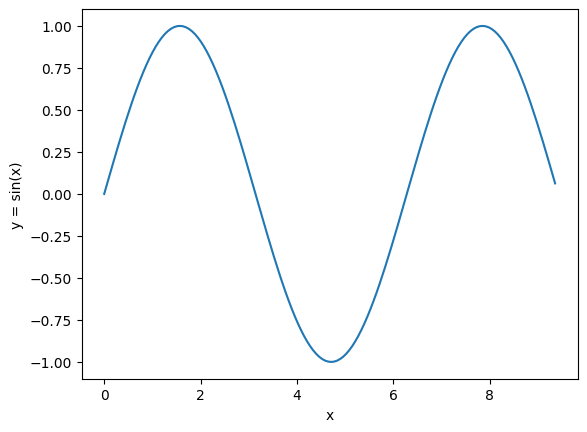

In [10]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = sin(x)")

Function definitions for the next part:

In [ ]:
from scipy.special import ndtr as ND

def qFunc(t,T,kappa,theta,sigma):
    return 

def kSquaredFunc(t,T,kappa,theta,sigma):
    return 0.0

def nFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def mFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def vSquaredFunc(t,T,kappa,theta,sigma):
    return 0.0

def fFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def hFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def PFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def VFunc(r,t,T,kappa,theta,sigma):
    return 1.0

- complete the functions $q$, $k^2$, $m$, $n$, $v^2$, $f$, $P$ and $V$ to solve for the option

- edit the functions to solve the version given in your coursework, save the figure of your results, upload and complete the coursework task!